In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
data = pd.read_csv("housing.csv")

In [269]:
data 
#checking the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [271]:
data.dropna(inplace=True)
#dealing with non-null data

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [273]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [274]:
X_train , X_test , y_train , y_test =  train_test_split(X, y, test_size=0.2)

In [275]:
train_data = X_train.join(y_train)

In [276]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20417,-118.86,34.19,29.0,1326.0,185.0,586.0,187.0,6.5474,<1H OCEAN,422900.0
1365,-122.13,38.02,52.0,2378.0,508.0,940.0,451.0,2.9583,NEAR BAY,166000.0
10123,-117.92,33.93,12.0,4415.0,890.0,1532.0,854.0,3.7500,<1H OCEAN,166300.0
4075,-118.43,34.13,37.0,4400.0,695.0,1521.0,666.0,8.2954,<1H OCEAN,500001.0
16597,-120.90,35.69,14.0,5020.0,909.0,2105.0,796.0,3.8158,<1H OCEAN,248700.0
...,...,...,...,...,...,...,...,...,...,...
15999,-122.47,37.75,52.0,1598.0,285.0,689.0,265.0,4.6071,NEAR BAY,337400.0
12334,-116.50,33.98,5.0,4332.0,868.0,1420.0,567.0,4.0417,INLAND,146400.0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND,72300.0
13526,-117.30,34.18,28.0,2685.0,425.0,1304.0,420.0,4.3676,INLAND,111100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

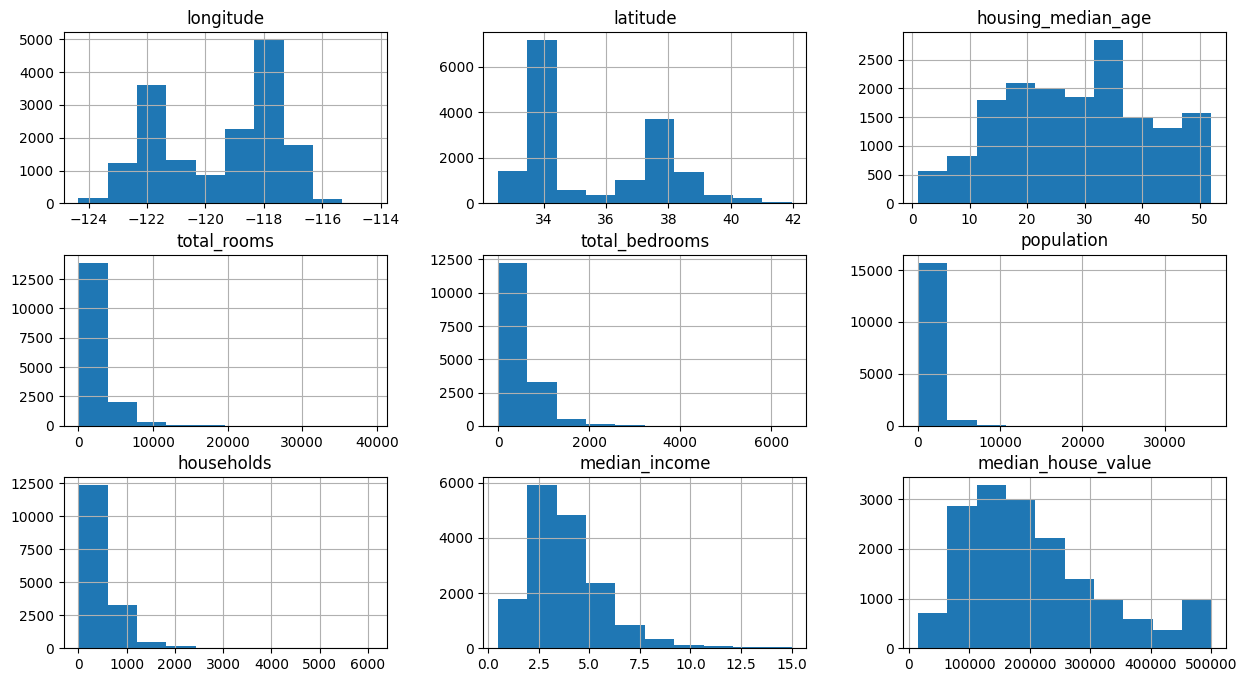

In [277]:
train_data.hist(figsize=(15,8))

<Axes: >

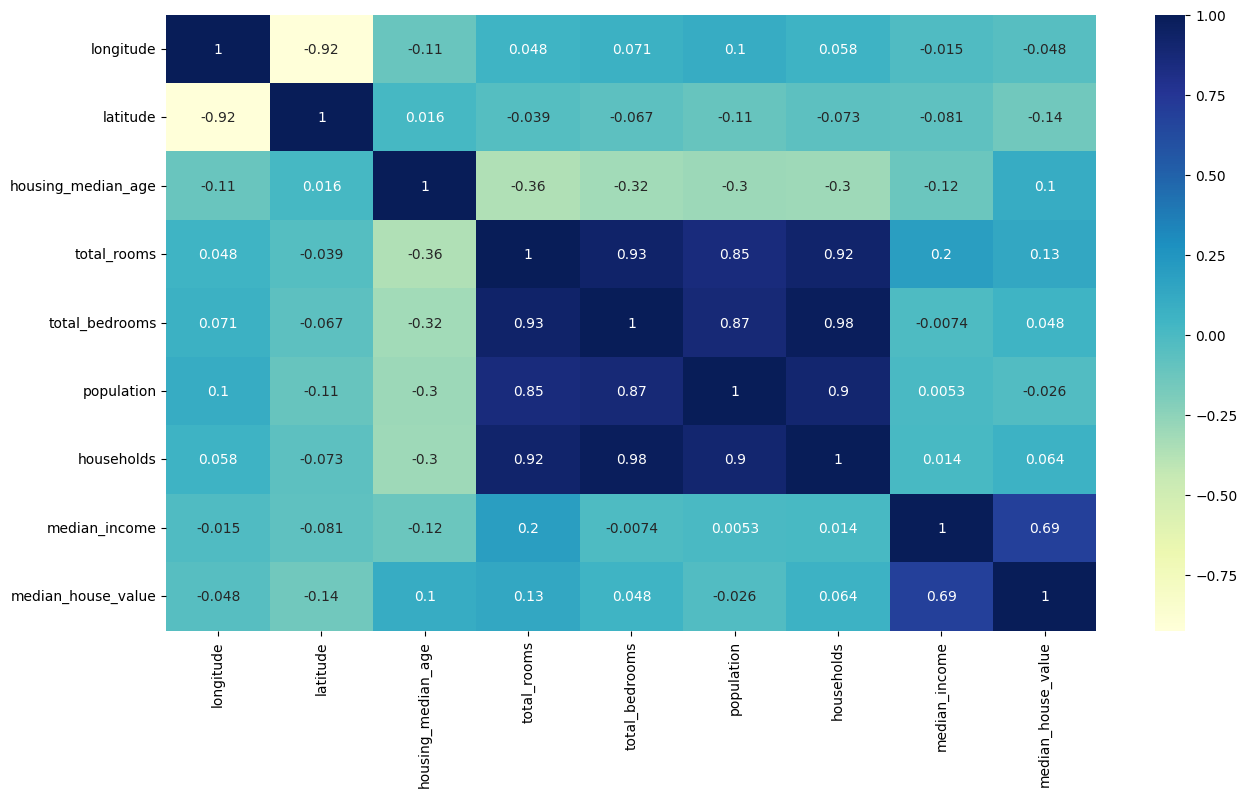

In [278]:
numeric_columns = train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu")

In [279]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] + 1)
train_data['population']= np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

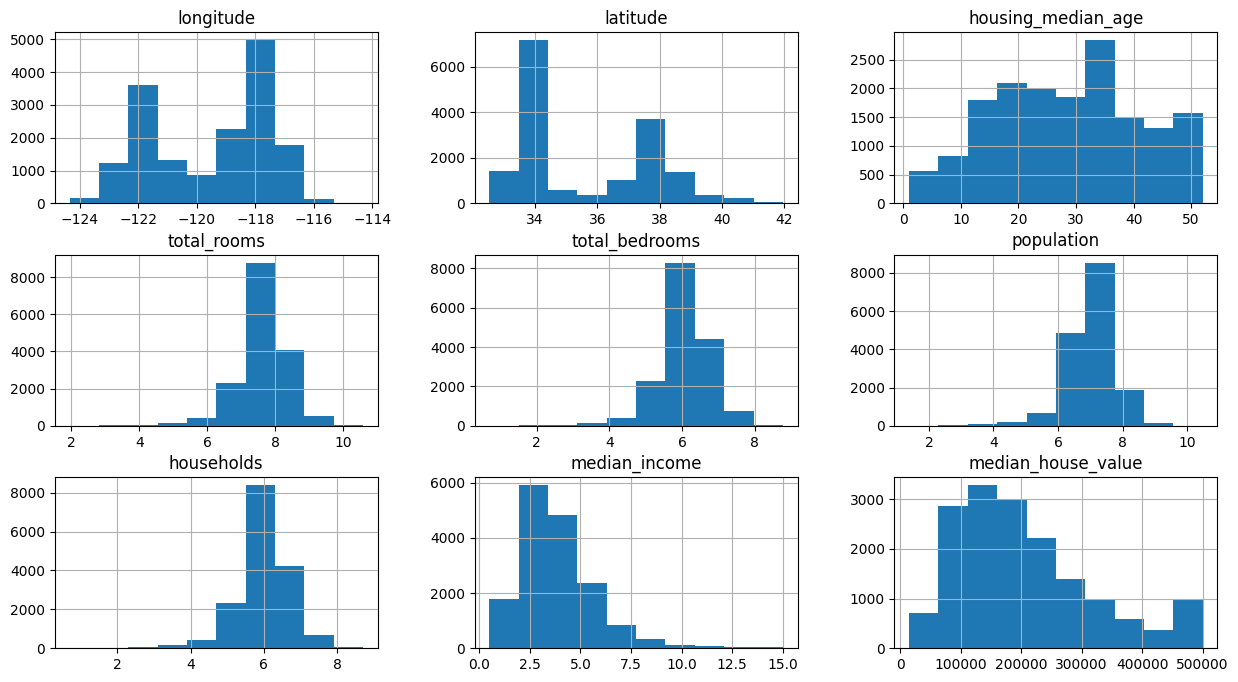

In [280]:
train_data.hist(figsize=(15,8))
#showing the data in a more welcoming graphs

In [281]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7234
INLAND        5196
NEAR OCEAN    2096
NEAR BAY      1817
ISLAND           3
Name: count, dtype: int64

In [282]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

In [283]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20417,-118.86,34.19,29.0,7.190676,5.225747,6.375025,5.236442,6.5474,422900.0,True,False,False,False,False
1365,-122.13,38.02,52.0,7.774436,6.232448,6.846943,6.113682,2.9583,166000.0,False,False,False,True,False
10123,-117.92,33.93,12.0,8.392990,6.792344,7.334982,6.751101,3.7500,166300.0,True,False,False,False,False
4075,-118.43,34.13,37.0,8.389587,6.545350,7.327781,6.502790,8.2954,500001.0,True,False,False,False,False
16597,-120.90,35.69,14.0,8.521384,6.813445,7.652546,6.680855,3.8158,248700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15999,-122.47,37.75,52.0,7.377134,5.655992,6.536692,5.583496,4.6071,337400.0,False,False,False,True,False
12334,-116.50,33.98,5.0,8.374015,6.767343,7.259116,6.342121,4.0417,146400.0,False,True,False,False,False
2144,-119.76,36.77,36.0,7.827241,6.146329,7.113142,6.163315,2.7850,72300.0,False,True,False,False,False
13526,-117.30,34.18,28.0,7.895808,6.054439,7.173958,6.042633,4.3676,111100.0,False,True,False,False,False


<Axes: >

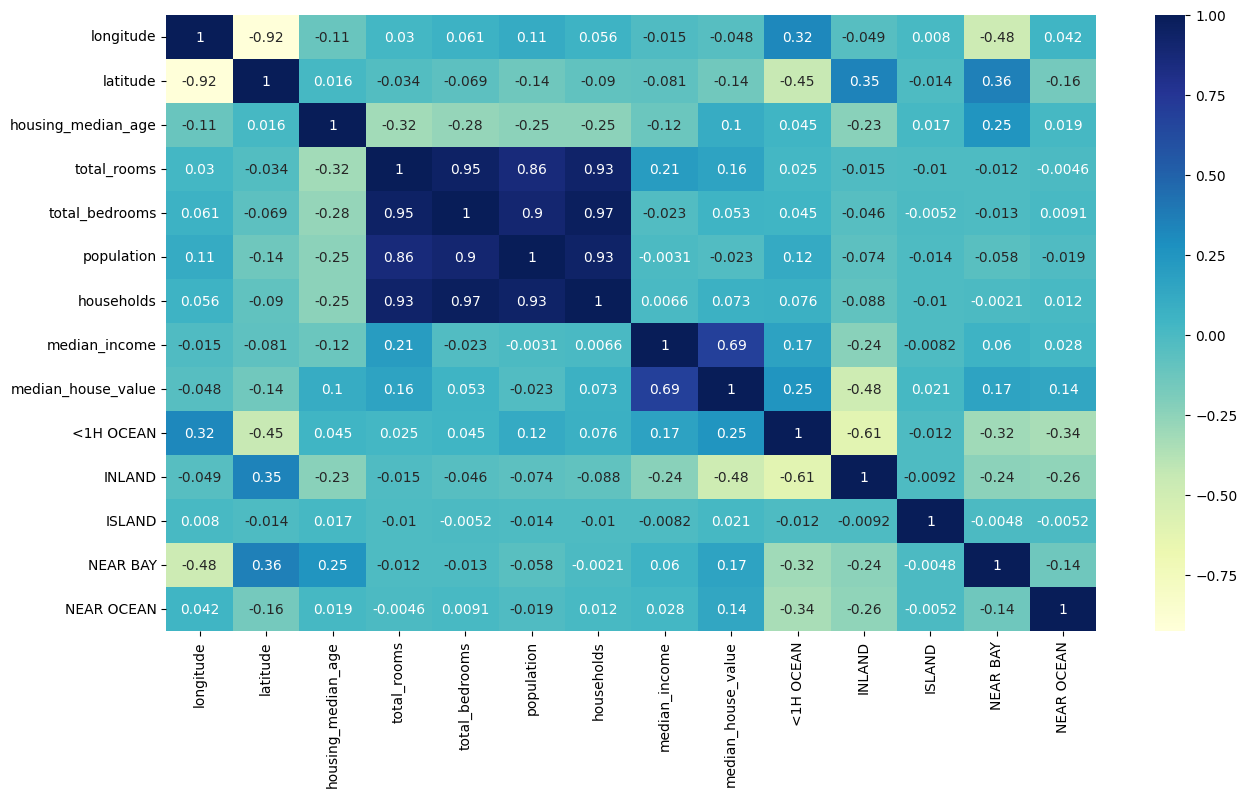

In [284]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

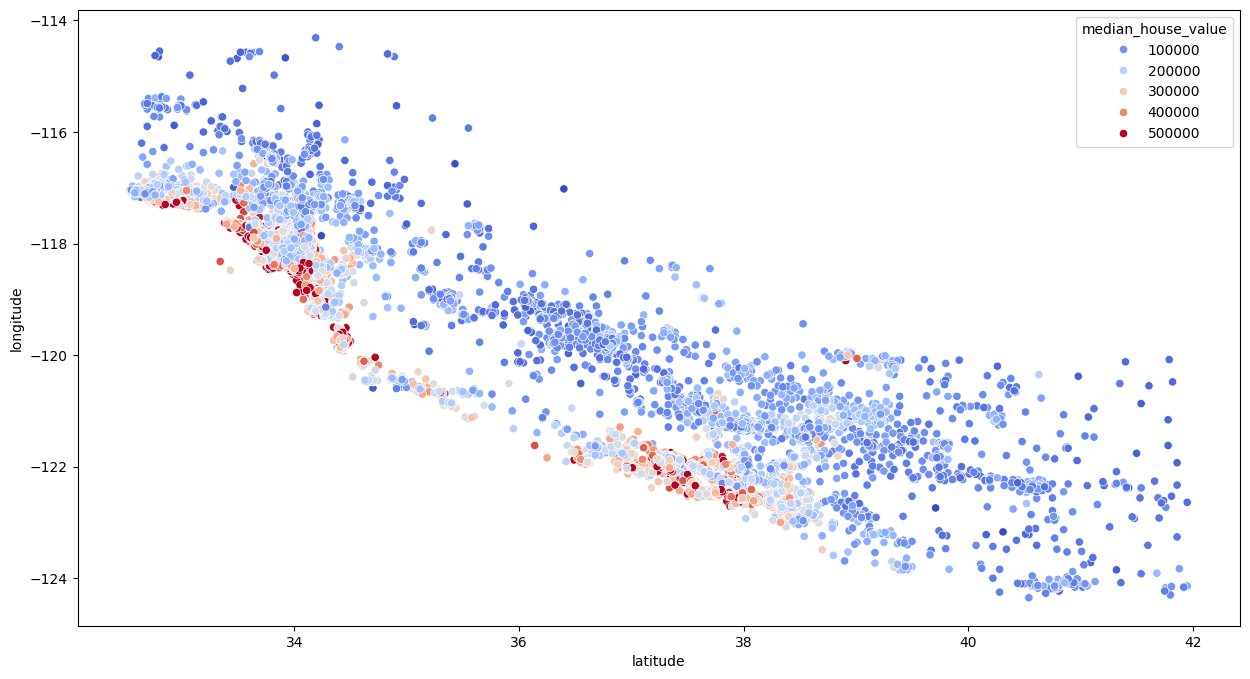

In [285]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
#inland is up , coast is down on the map of california

In [286]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

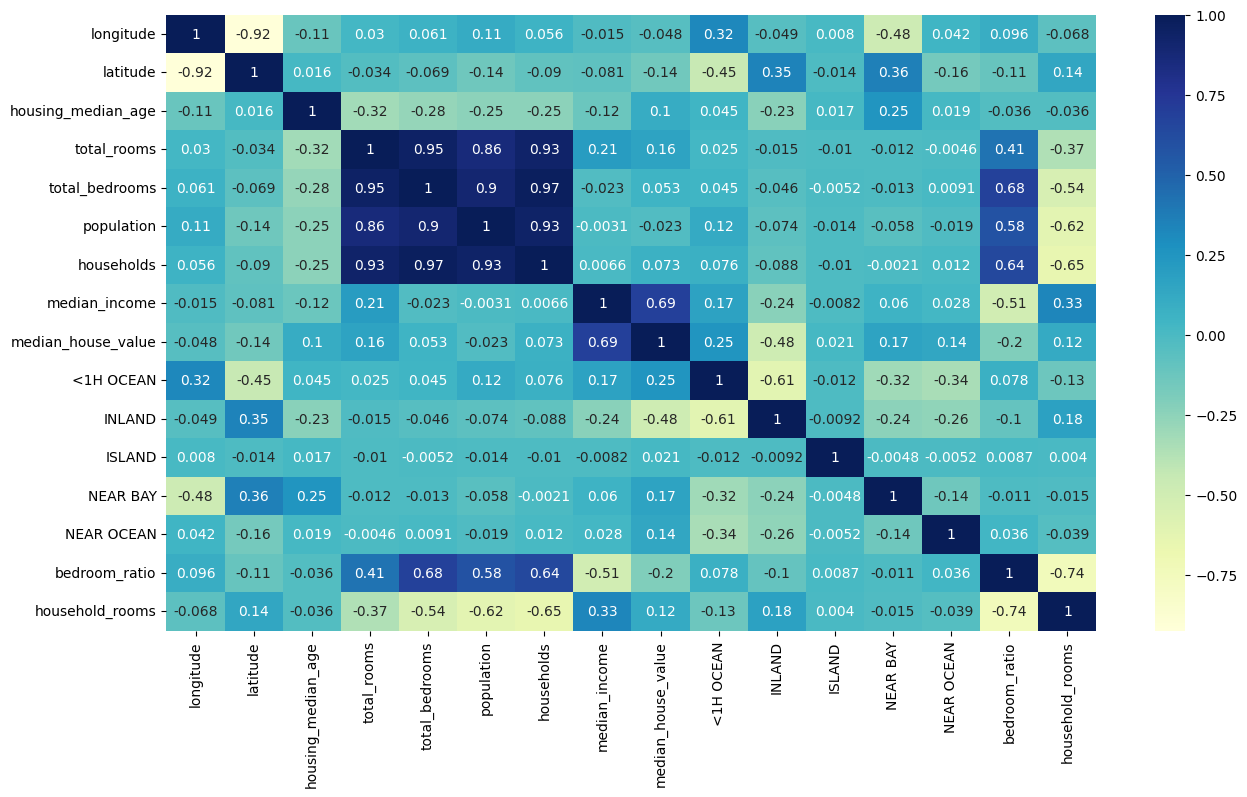

In [287]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = train_data.drop(['median_house_value'],axis=1 )
y_train = train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

#training
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [289]:
#testing data
test_data = X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'] + 1)
test_data['population']= np.log(test_data['population'] + 1)
test_data['households']= np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [293]:
X_test = test_data.drop(['median_house_value'],axis=1 )
y_test = test_data['median_house_value']

In [294]:
X_test_s = scaler.transform(X_test)

In [295]:
reg.score(X_test_s, y_test)

0.6625437585721581

In [296]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
reg.score(X_test, y_test)